<a href="https://colab.research.google.com/github/PeterBotros/SW/blob/main/p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/9_nlp_with_tensorflow/3_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Intro to Recurrent Neural Networks(RNNs)

<a name='1'></a>
# 1. Intro to Recurrent Neural Networks (RNN)

Recurrent Neural Networks (RNNs) are  neural network architecture that is suited for handling sequential datasets. Sequential datasets are these types of datasets that has some forms of sequence such as: sound(a sequence of sound waves), texts (sequence of words or characters), and time series.

When you are working with sequential data (say texts), you want to preserve the sequence of the information.

Take an example: Given the sentence `To day, I took my cat for a [....]`, can you predict the next word? In order for a machine to predict the next word in that sentence, there should be a way to maintain the flow and the sequence of the words, not only from the input to output, but also having a backward connection at each time step. That is where the notion of `recurrence` comes from.

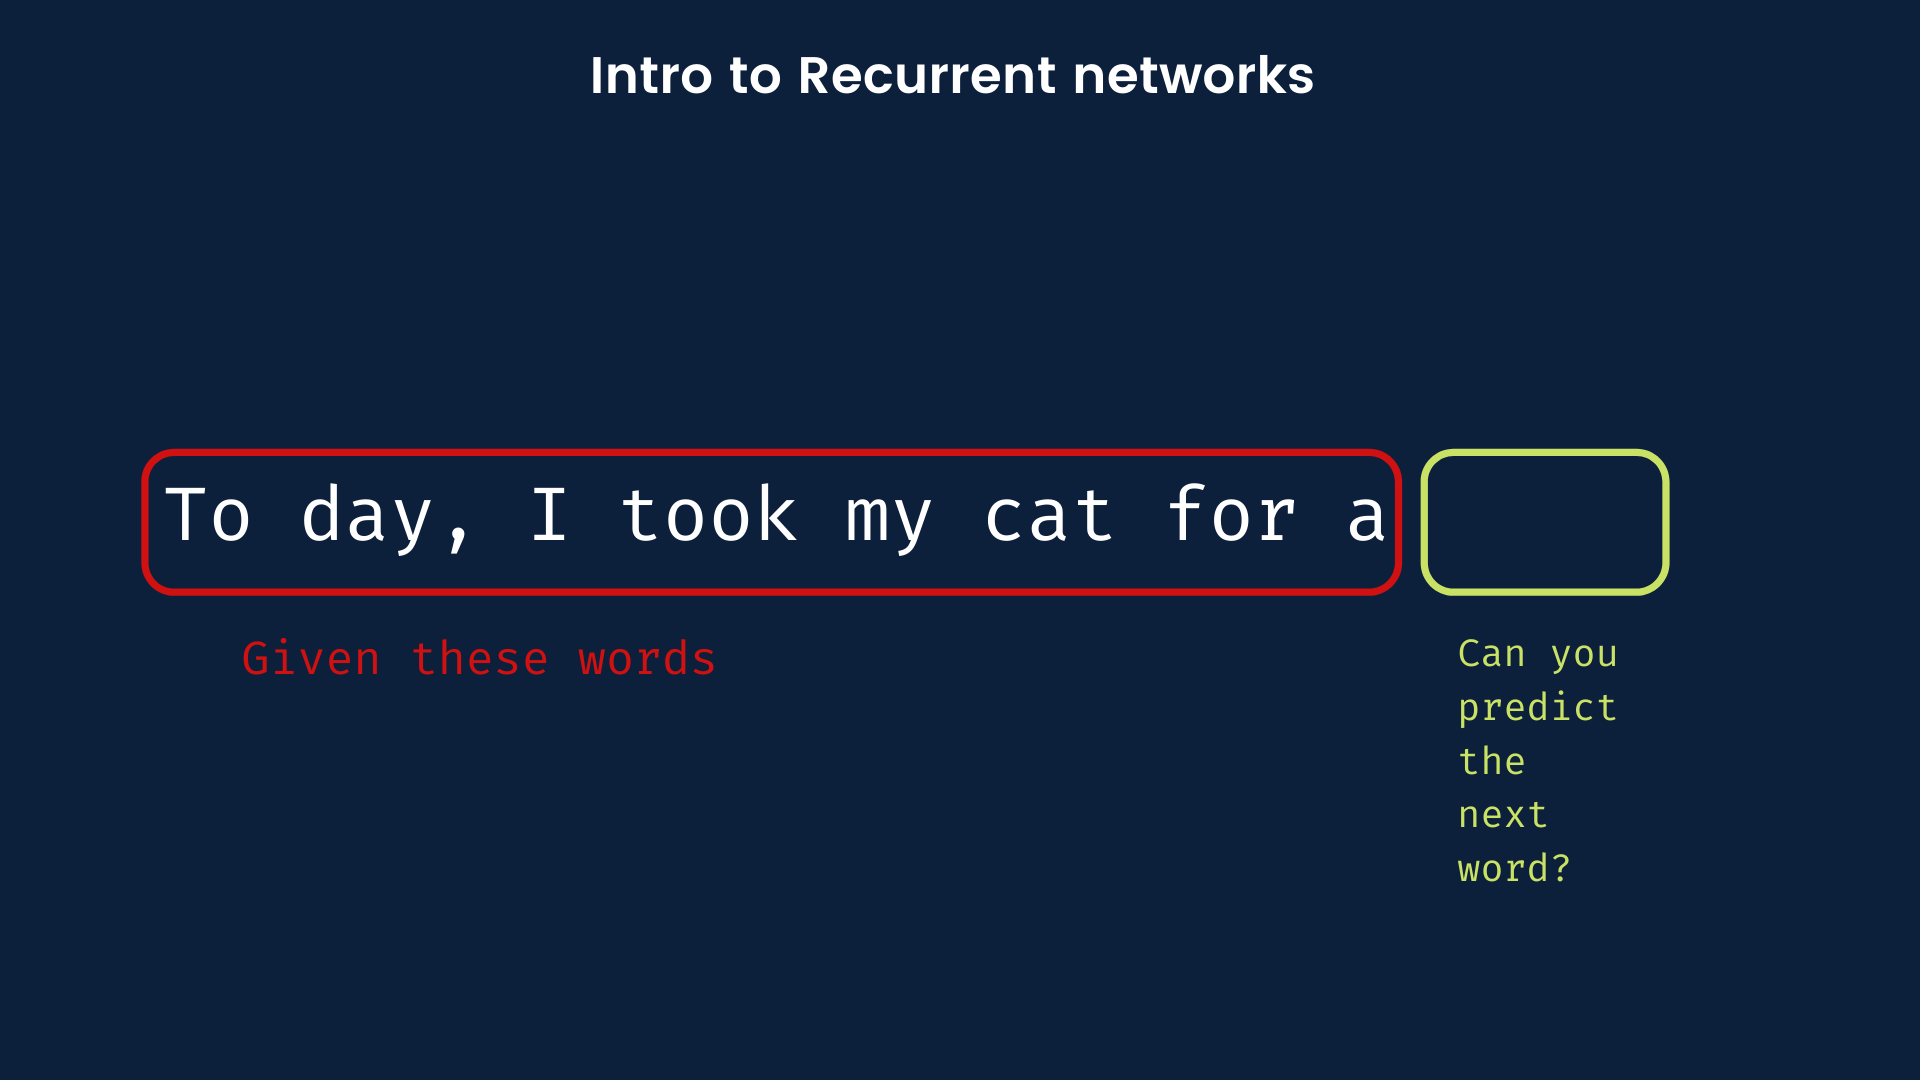


The conventional feedforward networks have a constant flow of information: The data goes straight from the input to output, whereas in RNNs, there is a feedback loop of data at each time step. Also, the input dimension of data to be fed to feedforward network is fixed, whereas RNNs can handle the data of variable input lengths/dimension.


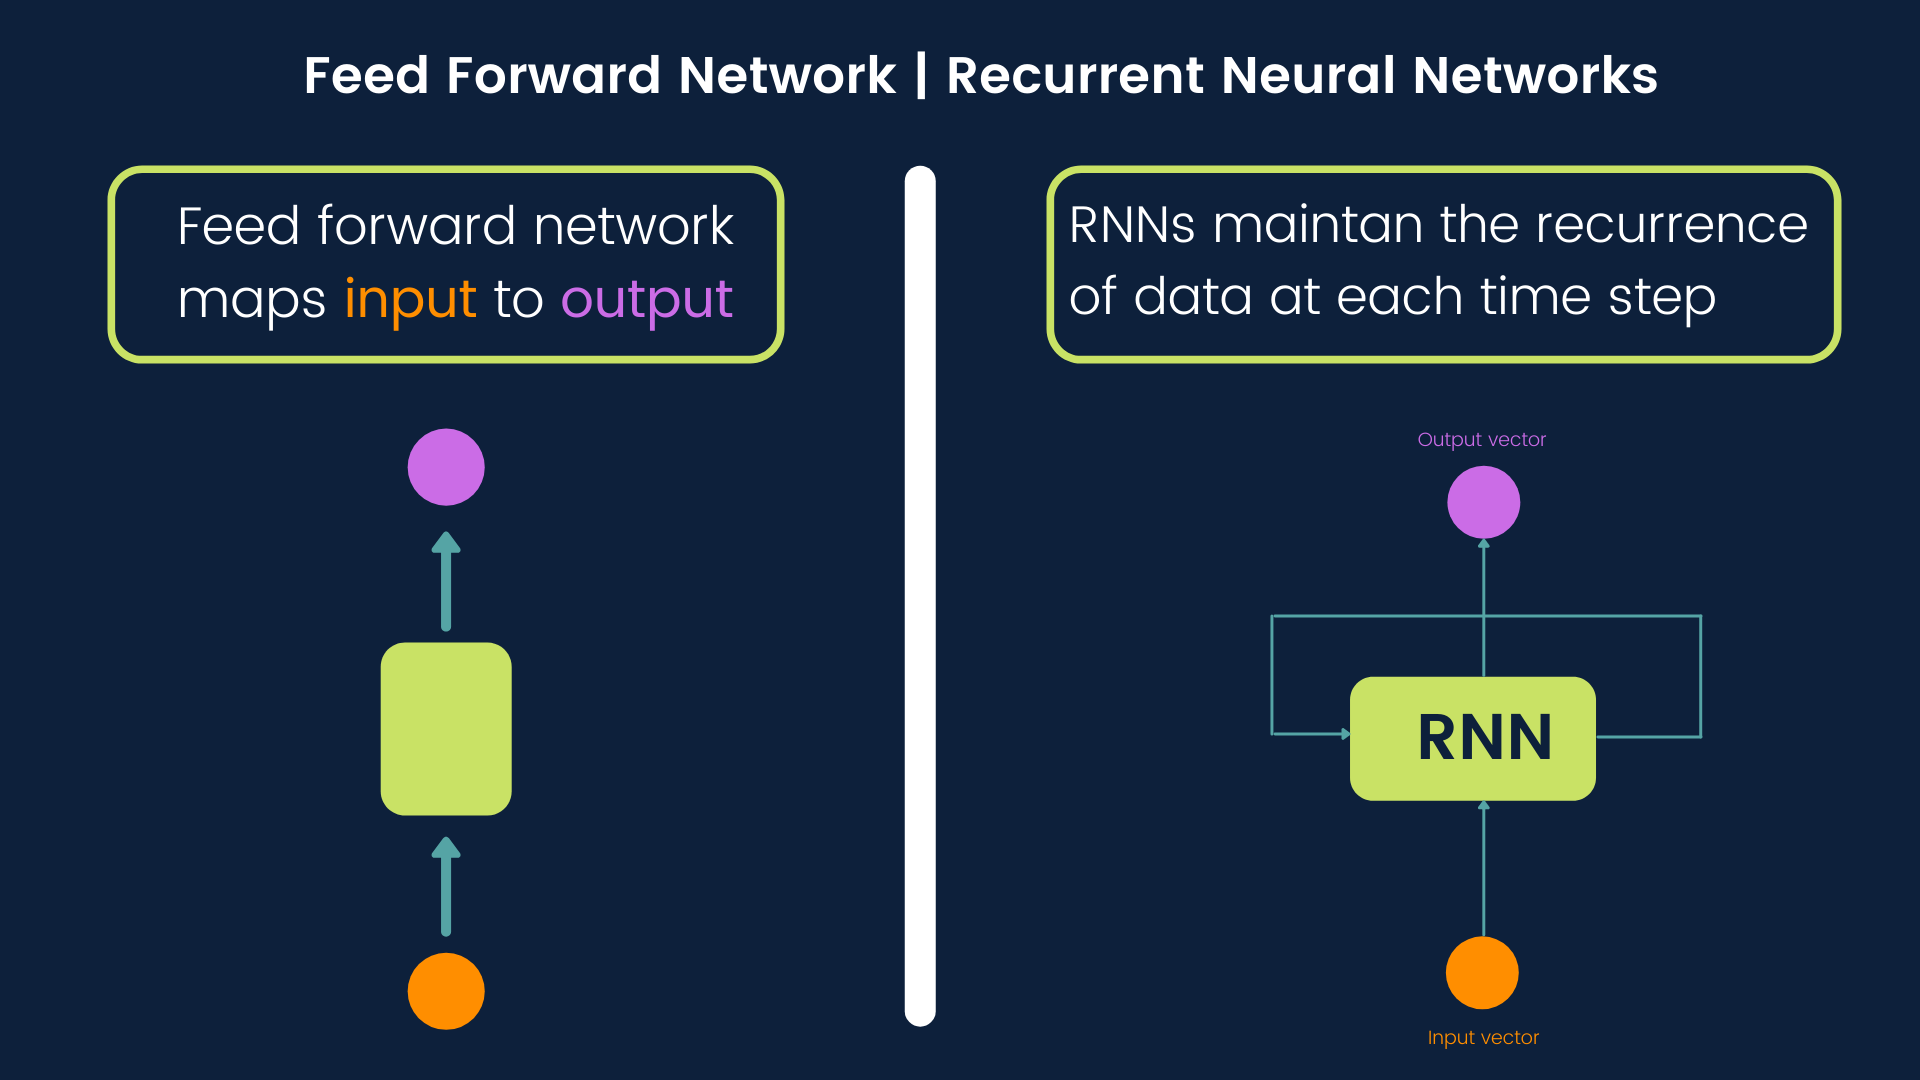

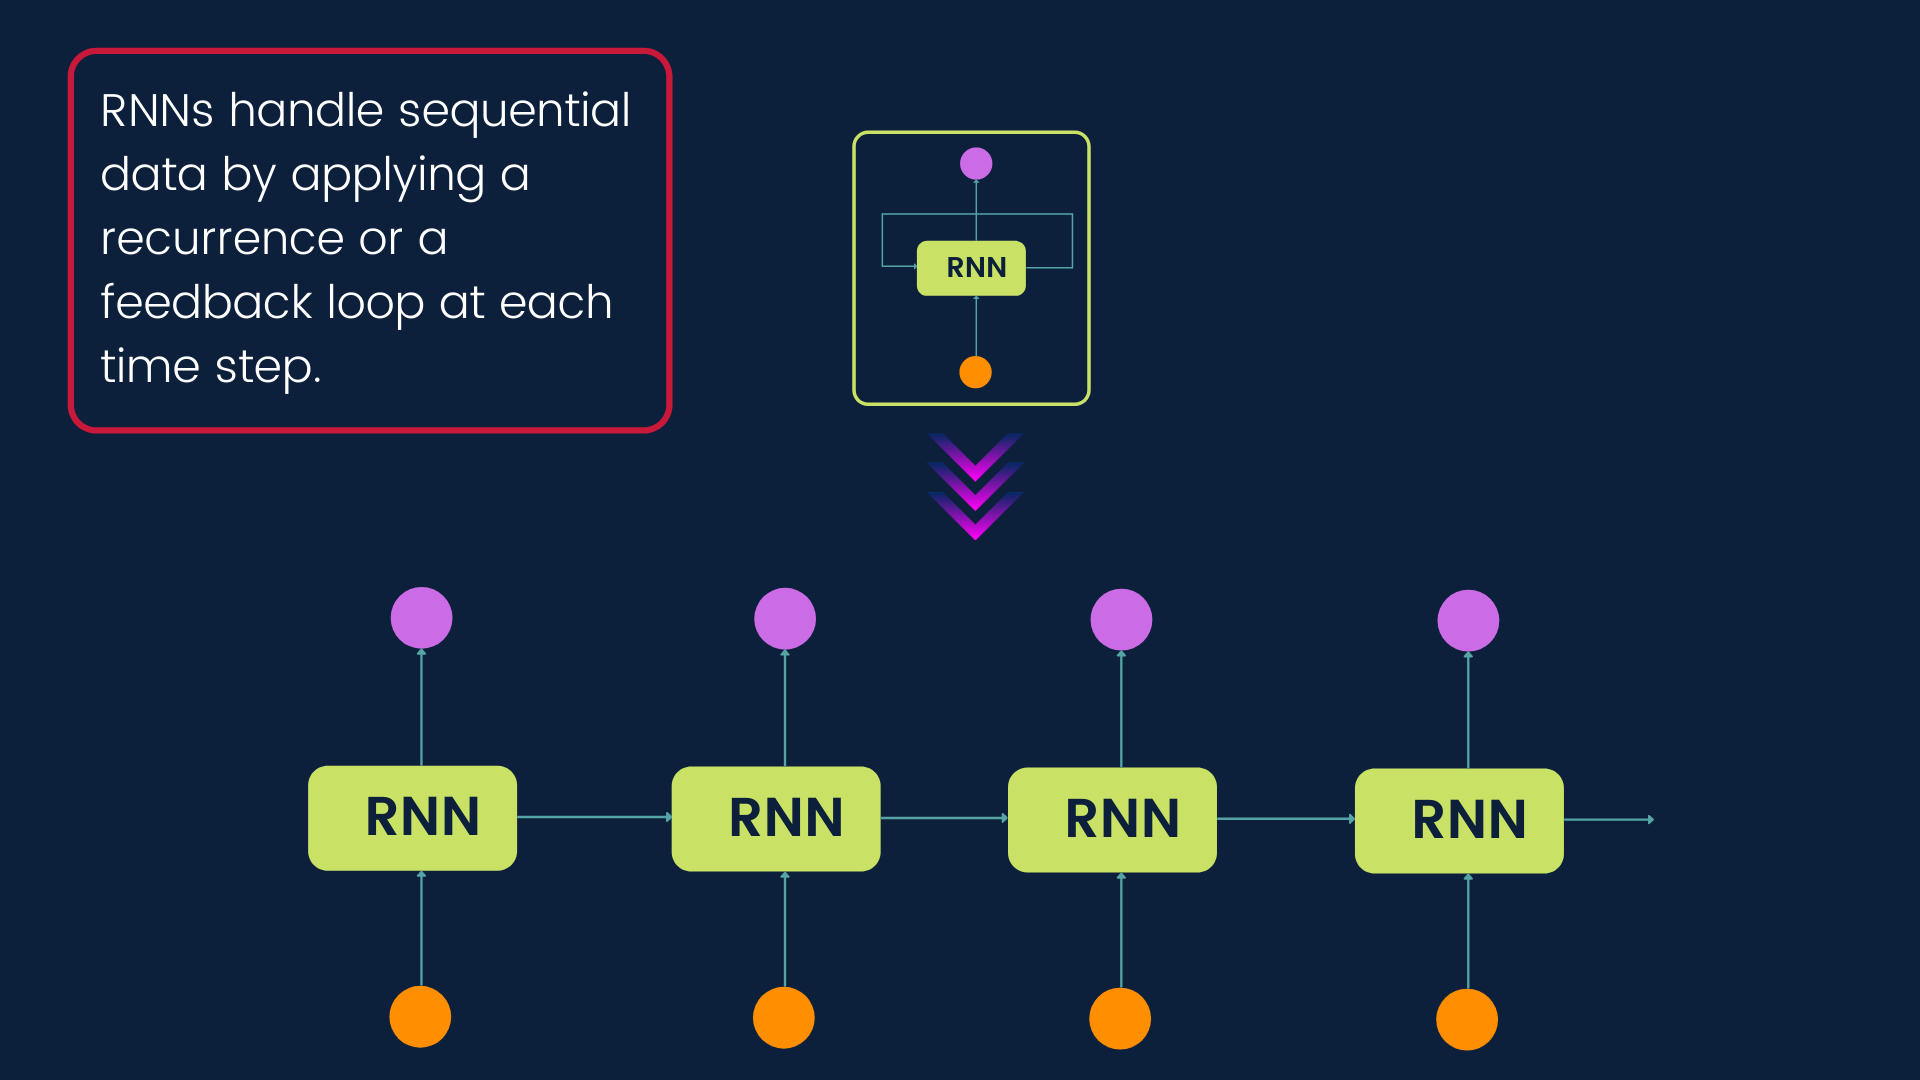

#### Applications of RNNs

RNNs can be used in any application that have the need of mantaining the recurrence of data.

Below are some of the RNN's applications:

* Machine translation
* Artificial music and text generation
* Sentiment analysis and text classification
* Medical signals analysis (such as ECG)
* Self driving cars trajectories

With that said, RNNs possesses some disadvantages. Because they have a small memory, they can not be able to track long term sequences. Also, they suffer from [vanishing and exploding gradients](https://www.youtube.com/watch?v=qhXZsFVxGKo). And these disadvantages motivates the other version of recurrent networks called Long Short Term Memories(LSTMs). More on LSTMs later.

<a name='2'></a>

# 2. RNNs In Practice: Simple RNN

<a name='2-1'></a>

## 2.1 Getting the Data

We are going to use Imdb movie reviews dataset available in [Keras built in datasets.](https://keras.io/api/datasets/)

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN,Dropout
from keras.layers import Embedding
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

import numpy as np
# fix random seed for reproducibility
numpy.random.seed(1)


In [ ]:
vocabulary_size = 10000

# We also want to have a finite length of reviews and not have to process really long sentences.
max_review_length = 500

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print('Number of reviews', len(X_train))
print('Length of first and fifth review before padding', len(X_train[0]) ,len(X_train[4]))
print('First review', X_train[0])
print('First label', y_train[0])

Number of reviews 25000
Length of first and fifth review before padding 218 147
First review [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print('Length of first and fifth review after padding', len(X_train[0]) ,len(X_train[4]))

Length of first and fifth review after padding 500 500


Loading the training and validation data from Keras datasets. There are 25.000 samples for training and 25.000 samples for validation.

Also, setting `vocab_size` to 10000 means we are only considering the first 10000 words, and `max_review_length` of 500 denotes that we will take the first 500 words in each movie review.

In [ ]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])


<a name='2-3'></a>

### 2.3. Build, Compile and Train the Model

The basic RNN is implemented in Keras as a layer. There are more [recurrent layers (LSTMs and GRUs)](https://keras.io/api/layers/recurrent_layers/) that we will see later, but for now we are going to use [`SimpleRNN`](https://keras.io/api/layers/recurrent_layers/) to classify the movie reviews.

In [ ]:
# %load sol3.py
model = Sequential()
embedding_dim=100
model.add(Embedding(vocabulary_size, embedding_dim, input_length=500)) #no of parameters = 10000*100
model.add(SimpleRNN(100)) #100*100+100*100+100 #(num_features*num_units + num_units* num_units + num_units) #https://datascience.stackexchange.com/questions/88436/number-of-parameters-in-simple-rnns

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 500))
print(model.summary())

history=model.fit(X_train, y_train, epochs=4, batch_size=200, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 500, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,020,201 (3.89 MB)

 Trainable params: 1,020,201 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.5257 - loss: 0.6921 - val_accuracy: 0.6075 - val_loss: 0.6630
Epoch 2/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.6637 - loss: 0.6272 - val_accuracy: 0.6396 - val_loss: 0.6276
Epoch 3/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7154 - loss: 0.5540 - val_accuracy: 0.7162 - val_loss: 0.5485
Epoch 4/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8189 - loss: 0.4130 - val_accuracy: 0.7522 - val_loss: 0.5131
Accuracy: 75.22%


<a name='2-4'></a>

### 2.4. Visualizing the Model Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# function to plot accuracy and loss

def plot_acc_loss(history):

  model_history = history.history
  acc = model_history['accuracy']
  val_acc = model_history['val_accuracy']
  loss = model_history['loss']
  val_loss = model_history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

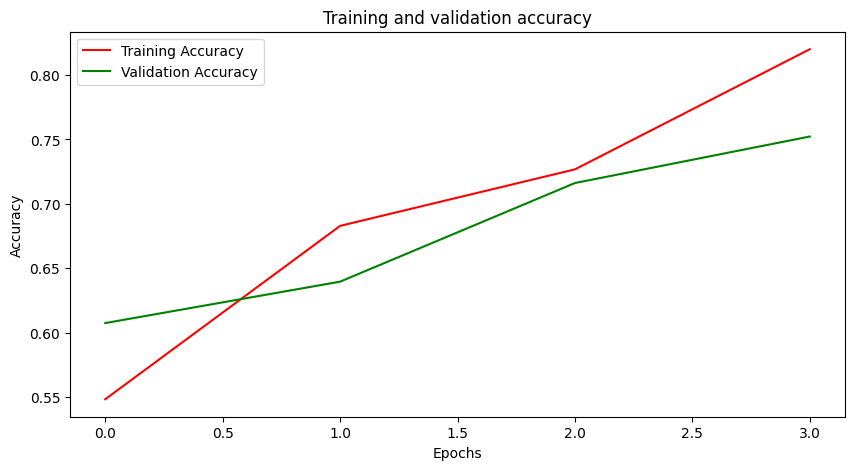

<Figure size 640x480 with 0 Axes>

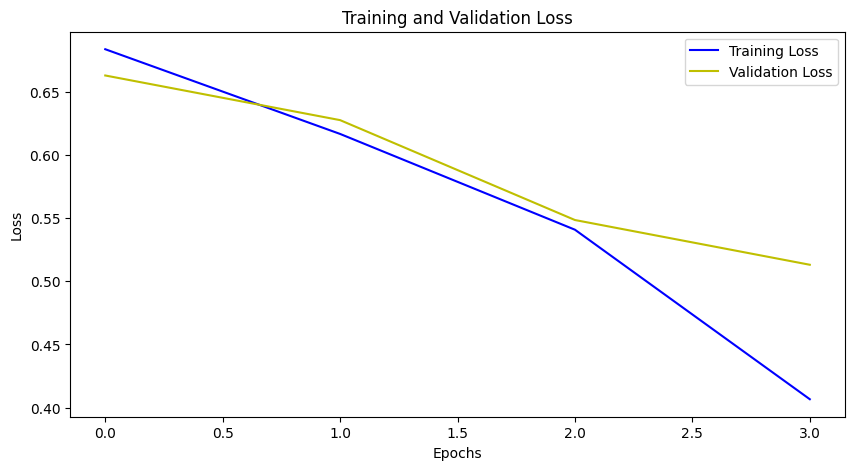

In [ ]:
plot_acc_loss(history)

**Lab Task** : On a review data generated by misteral le chat https://chat.mistral.ai/chat

In [ ]:
import pandas as pd
import numpy as np

# Generate a larger dataset with 500 entries
data = {
    'text': [
        "I love this product", "This is terrible", "Amazing experience", "Worst service ever",
        "Highly recommend", "Not worth the price", "Very satisfied", "Disappointed",
        "Will buy again", "Never coming back", "Excellent quality", "Poor quality",
        "Best purchase ever", "Awful experience", "Great value", "Overpriced",
        "Perfect fit", "Does not fit well", "Beautiful design", "Ugly design",
        "Easy to use", "Difficult to use", "Fast delivery", "Slow delivery",
        "Good customer service", "Bad customer service", "Happy with the purchase",
        "Unhappy with the purchase", "Fantastic", "Horrible", "Impressed", "Not impressed",
        "Satisfied", "Dissatisfied", "Pleasant", "Unpleasant", "Enjoyable", "Not enjoyable",
        "Wonderful", "Terrible", "Delightful", "Awful", "Superb", "Dreadful",
        "Marvelous", "Miserable", "Splendid", "Wretched", "Magnificent", "Appalling",
        "Glorious", "Dismal", "Radiant", "Gloomy", "Resplendent", "Depressing",
        "Dazzling", "Dreary", "Brilliant", "Grim", "Luminous", "Somber",
        "Vibrant", "Melancholy", "Bright", "Grimy", "Shiny", "Dull",
        "Sparkling", "Bleak", "Gleaming", "Murky", "Glowing", "Dim",
        "Lustrous", "Faded", "Bustling", "Desolate", "Lively", "Lifeless",
        "Animated", "Stagnant", "Dynamic", "Stale", "Energetic", "Lethargic",
        "Vigorous", "Sluggish", "Active", "Inert", "Bubbly", "Flat",
        "Exciting", "Boring", "Thrilling", "Dull", "Captivating", "Mundane",
        "I love this product", "This is terrible", "Amazing experience", "Worst service ever",
        "Highly recommend", "Not worth the price", "Very satisfied", "Disappointed",
        "Will buy again", "Never coming back", "Excellent quality", "Poor quality",
        "Best purchase ever", "Awful experience", "Great value", "Overpriced",
        "Perfect fit", "Does not fit well", "Beautiful design", "Ugly design",
        "Easy to use", "Difficult to use", "Fast delivery", "Slow delivery",
        "Good customer service", "Bad customer service", "Happy with the purchase",
        "Unhappy with the purchase", "Fantastic", "Horrible", "Impressed", "Not impressed",
        "Satisfied", "Dissatisfied", "Pleasant", "Unpleasant", "Enjoyable", "Not enjoyable",
        "Wonderful", "Terrible", "Delightful", "Awful", "Superb", "Dreadful",
        "Marvelous", "Miserable", "Splendid", "Wretched", "Magnificent", "Appalling",
        "Glorious", "Dismal", "Radiant", "Gloomy", "Resplendent", "Depressing",
        "Dazzling", "Dreary", "Brilliant", "Grim", "Luminous", "Somber",
        "Vibrant", "Melancholy", "Bright", "Grimy", "Shiny", "Dull",
        "Sparkling", "Bleak", "Gleaming", "Murky", "Glowing", "Dim",
        "Lustrous", "Faded", "Bustling", "Desolate", "Lively", "Lifeless",
        "Animated", "Stagnant", "Dynamic", "Stale", "Energetic", "Lethargic",
        "Vigorous", "Sluggish", "Active", "Inert", "Bubbly", "Flat",
        "Exciting", "Boring", "Thrilling", "Dull", "Captivating", "Mundane",
        "I love this product", "This is terrible", "Amazing experience", "Worst service ever",
        "Highly recommend", "Not worth the price", "Very satisfied", "Disappointed",
        "Will buy again", "Never coming back", "Excellent quality", "Poor quality",
        "Best purchase ever", "Awful experience", "Great value", "Overpriced",
        "Perfect fit", "Does not fit well", "Beautiful design", "Ugly design",
        "Easy to use", "Difficult to use", "Fast delivery", "Slow delivery",
        "Good customer service", "Bad customer service", "Happy with the purchase",
        "Unhappy with the purchase", "Fantastic", "Horrible", "Impressed", "Not impressed",
        "Satisfied", "Dissatisfied", "Pleasant", "Unpleasant", "Enjoyable", "Not enjoyable",
        "Wonderful", "Terrible", "Delightful", "Awful", "Superb", "Dreadful",
        "Marvelous", "Miserable", "Splendid", "Wretched", "Magnificent", "Appalling",
        "Glorious", "Dismal", "Radiant", "Gloomy", "Resplendent", "Depressing",
        "Dazzling", "Dreary", "Brilliant", "Grim", "Luminous", "Somber",
        "Vibrant", "Melancholy", "Bright", "Grimy", "Shiny", "Dull",
        "Sparkling", "Bleak", "Gleaming", "Murky", "Glowing", "Dim",
        "Lustrous", "Faded", "Bustling", "Desolate", "Lively", "Lifeless",
        "Animated", "Stagnant", "Dynamic", "Stale", "Energetic", "Lethargic",
        "Vigorous", "Sluggish", "Active", "Inert", "Bubbly", "Flat",
        "Exciting", "Boring", "Thrilling", "Dull", "Captivating", "Mundane",
        "I love this product", "This is terrible", "Amazing experience", "Worst service ever",
        "Highly recommend", "Not worth the price", "Very satisfied", "Disappointed",
        "Will buy again", "Never coming back", "Excellent quality", "Poor quality",
        "Best purchase ever", "Awful experience", "Great value", "Overpriced",
        "Perfect fit", "Does not fit well", "Beautiful design", "Ugly design",
        "Easy to use", "Difficult to use", "Fast delivery", "Slow delivery",
        "Good customer service", "Bad customer service", "Happy with the purchase",
        "Unhappy with the purchase", "Fantastic", "Horrible", "Impressed", "Not impressed",
        "Satisfied", "Dissatisfied", "Pleasant", "Unpleasant", "Enjoyable", "Not enjoyable",
        "Wonderful", "Terrible", "Delightful", "Awful", "Superb", "Dreadful",
        "Marvelous", "Miserable", "Splendid", "Wretched", "Magnificent", "Appalling",
        "Glorious", "Dismal", "Radiant", "Gloomy", "Resplendent", "Depressing",
        "Dazzling", "Dreary", "Brilliant", "Grim", "Luminous", "Somber",
        "Vibrant", "Melancholy", "Bright", "Grimy", "Shiny", "Dull",
        "Sparkling", "Bleak", "Gleaming", "Murky", "Glowing", "Dim",
        "Lustrous", "Faded", "Bustling", "Desolate", "Lively", "Lifeless",
        "Animated", "Stagnant", "Dynamic", "Stale", "Energetic", "Lethargic",
        "Vigorous", "Sluggish", "Active", "Inert", "Bubbly", "Flat",
        "Exciting", "Boring", "Thrilling", "Dull", "Captivating", "Mundane",
        "I love this product", "This is terrible", "Amazing experience", "Worst service ever",
        "Highly recommend", "Not worth the price", "Very satisfied", "Disappointed",
        "Will buy again", "Never coming back", "Excellent quality", "Poor quality",
        "Best purchase ever", "Awful experience", "Great value", "Overpriced",
        "Perfect fit", "Does not fit well", "Beautiful design", "Ugly design",
        "Easy to use", "Difficult to use", "Fast delivery", "Slow delivery",
        "Good customer service", "Bad customer service", "Happy with the purchase",
        "Unhappy with the purchase", "Fantastic", "Horrible", "Impressed", "Not impressed",
        "Satisfied", "Dissatisfied", "Pleasant", "Unpleasant", "Enjoyable", "Not enjoyable",
        "Wonderful", "Terrible", "Delightful", "Awful", "Superb", "Dreadful",
        "Marvelous", "Miserable", "Splendid", "Wretched", "Magnificent", "Appalling",
        "Glorious", "Dismal", "Radiant", "Gloomy", "Resplendent", "Depressing",
        "Dazzling", "Dreary", "Brilliant", "Grim", "Luminous", "Somber",
        "Vibrant", "Melancholy", "Bright", "Grimy", "Shiny", "Dull",
        "Sparkling", "Bleak", "Gleaming", "Murky", "Glowing", "Dim",
        "Lustrous", "Faded", "Bustling", "Desolate", "Lively", "Lifeless",
        "Animated", "Stagnant", "Dynamic", "Stale", "Energetic", "Lethargic",
        "Vigorous", "Sluggish", "Active", "Inert", "Bubbly", "Flat"
    ],
    'label': [
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0
    ]
}




# Check the lengths of the lists
text_length = len(data['text'])
label_length = len(data['label'])

# Ensure both lists have the same length
if text_length != label_length:
    # If lengths are different, adjust the shorter list by padding or truncating
    min_length = min(text_length, label_length)
    data['text'] = data['text'][:min_length] #Truncate the longer list
    data['label'] = data['label'][:min_length] #Truncate the longer list


# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('dataset.csv', index=False)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#read the csv
df = pd.read_csv('dataset.csv')

# Preprocess the data
texts = df['text'].values
labels = df['label'].values

# Tokenize the text
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)
# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences) # Determine the maximum sequence length
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

In [ ]:
# Build the SimpleRNN model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=100, input_length=max_sequence_length))
model.add(SimpleRNN(units=64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, max_sequence_length))
print(model.summary())

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=10, # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stopping] # Include the early stopping callback
)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7229 - loss: 0.6304
Test Accuracy: 72.50%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 72.50%


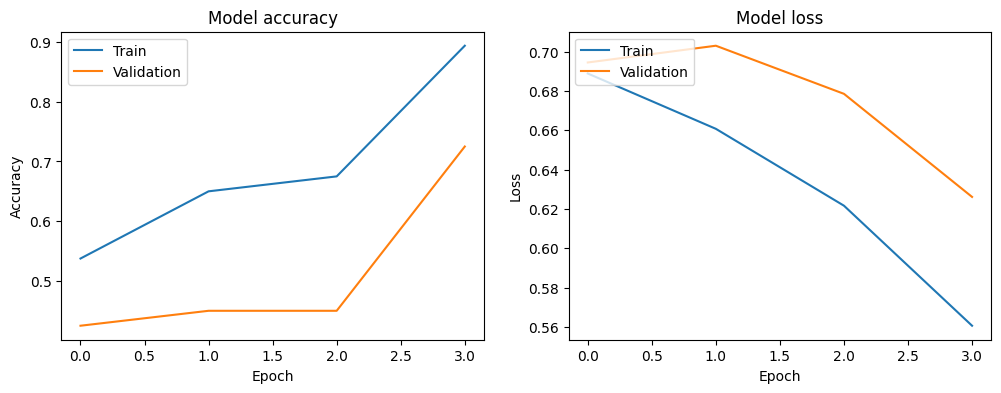

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.show()